In [34]:
import SimpleITK as sitk
import json
import numpy as np
from glob import glob
from pathlib import Path
import matplotlib.pyplot as plt
import pydicom
import pandas as pd

CASE_PATH = r'C:\Users\ang.a\OneDrive - Technion\Documents\MRI_Data\clean cases\15'
# ANNOTATION_DATA = r'C:\Users\ang.a\OneDrive - Technion\Documents\MRI_Data\test_dir\6\data\23.12.2021__04_02..annotation.json'

In [35]:
reader = sitk.ImageSeriesReader()
dicom_names = reader.GetGDCMSeriesFileNames(CASE_PATH)
reader.SetFileNames(dicom_names)
image = reader.Execute()

nda = sitk.GetArrayFromImage(image)
# nda = np.flipud(nda)

np.array(image.GetDirection()).reshape(3,3)

array([[ 1.,  0.,  0.],
       [ 0., -0.,  1.],
       [ 0., -1., -0.]])

The annotation:

In [6]:
# open and read the annotation data
with open(ANNOTATION_DATA, 'r') as f: 
    annotation_points = json.load(f)
    data = annotation_points['MPR points']

data = np.array(data)
data[-1] 

array([  19.9682    ,  -32.58782609, -162.5496    ])

In [29]:
data[0][0] * image.GetSpacing()[0]

-63.343280160000006

In [8]:
index_data = []

for i in data:
    index_data.append(image.TransformPhysicalPointToIndex(i))

index_data = np.array(index_data)

In [9]:
indices = sorted([i for i in np.unique(index_data[:,2])])
indices

[16, 17, 18, 19, 20, 21, 22]

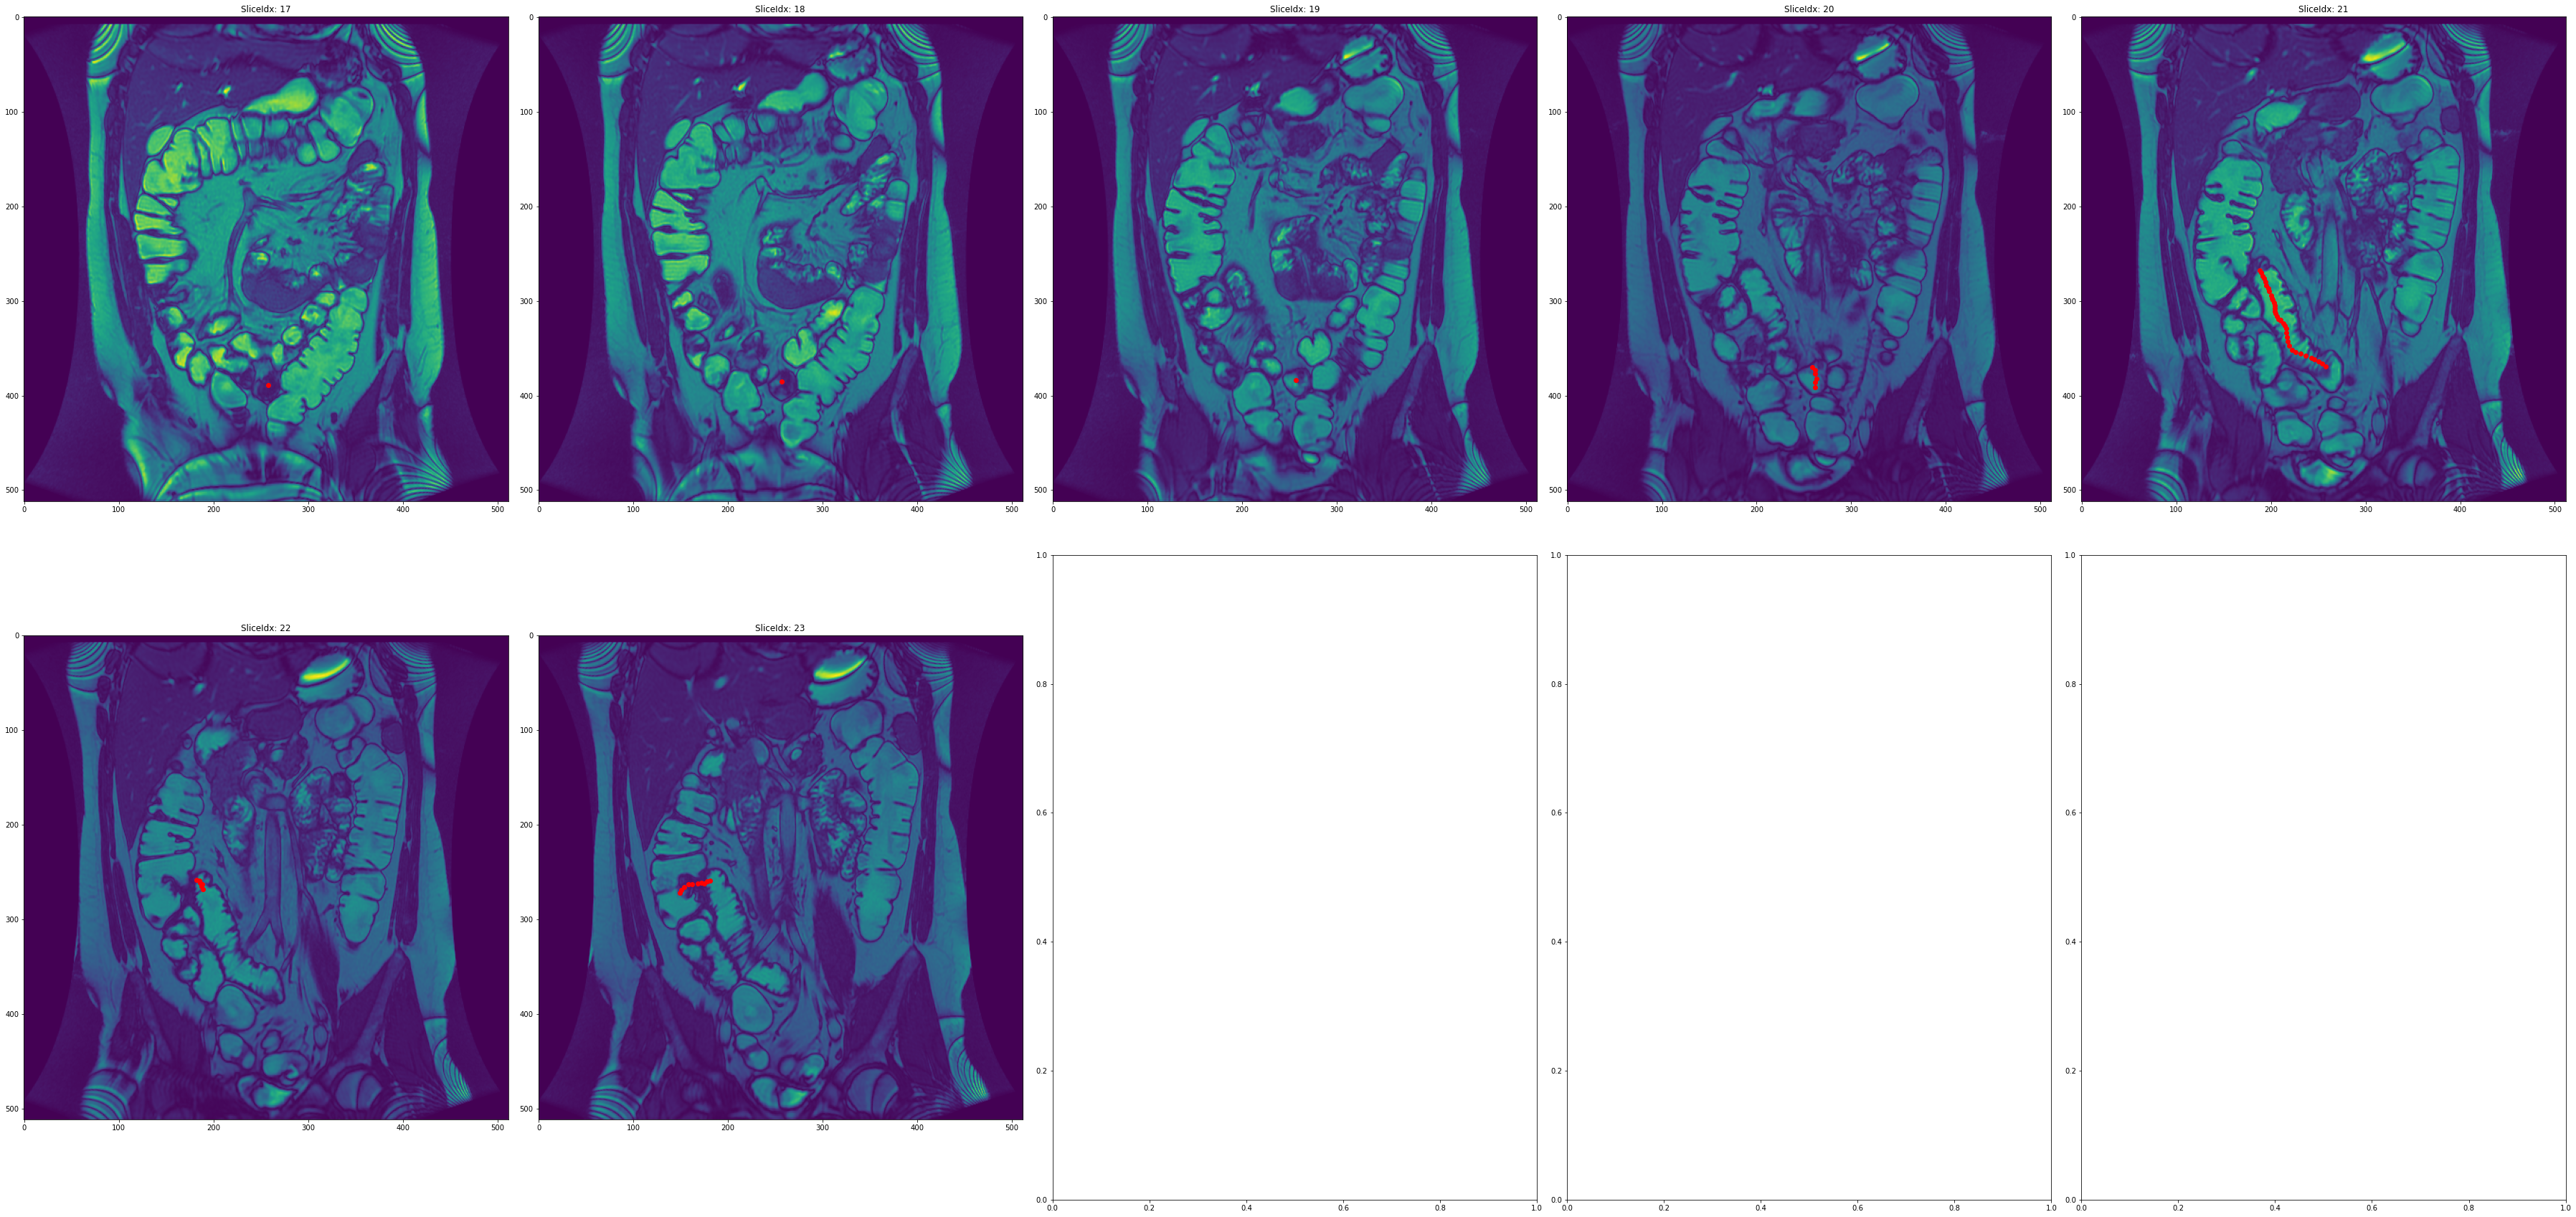

In [12]:
# show all slices
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(50,25))

axs = np.ravel(axs)

for idx, i in enumerate(indices):
    axs[idx].set_title(f'SliceIdx: {i+1}')
    axs[idx].imshow(nda[i+1,:,:])

    for pt in index_data:
        if pt[2] == i:
            axs[idx].plot(pt[0], pt[1], 'ro')
plt.tight_layout()
